# ML Assignment 1

Data set 1 - Bank Account Fraud Dataset \
https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022 \
Data set 2 - Customer Segmentation \
https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation?select=train.csv


In [24]:
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
import seaborn as sns

In [91]:
def load_data(path):
    df = pd.read_csv(path, nrows = 5000)
#     df = df.sample(n = 5000)
    # df = df.dropna()
    # df.columns = [i.lower() for i in df.columns]
    # df.drop(columns = ['payment_type', 'employment_status', 'housing_status', 'source','device_os'], inplace=True)
    return df
df = load_data('Base.csv')
# display(df)

# EDA function

In [92]:
def df_info(df, target):
#     target = 'fraud_bool'
    print('data size: \n', df.shape)
    print('target variable size: \n',df[[target]].value_counts())
    print('columns: \n', df.columns)

In [105]:
def distribution_graph(df, target_col):
    for i, col in enumerate(df.columns[:]):
    #     fig = plt.figure()
    #     ax = fig.add_subplot(111)
    #     ax.set(title=col)
    #     ax.hist(df[col])
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        plt.figure(i)
        sns.histplot(df, x=col, hue=target_col ,multiple='stack', bins=100)

In [94]:
def corr_heatmap(df):
    # Correlation heatmap
    co = pd.DataFrame(df.corr())
    co2 = co[(co>=0.5) | (co<=-0.5)]
    # .dropna(axis=0, thresh=1, how="any")
    plt.figure(figsize=(20, 10))
    mask = np.zeros_like(co2)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(co2,vmin=-1, vmax=1,cmap='BrBG', annot=True, mask=mask,linewidths=2,linecolor='b' )

In [95]:
def missing_value(df):
    nacol = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
    nacol = nacol[nacol[0]>0]
    print(nacol)

# Data 1

In [96]:
df1 = load_data('Base.csv')
df1.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [97]:
df_info(df1, 'fraud_bool')

data size: 
 (5000, 32)
target variable size: 
 fraud_bool
0             3572
1             1428
dtype: int64
columns: 
 Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')


In [98]:
missing_value(df1)

Empty DataFrame
Columns: [0]
Index: []


C:\Users\binlu\AppData\Local\Temp/ipykernel_27268/2004985724.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


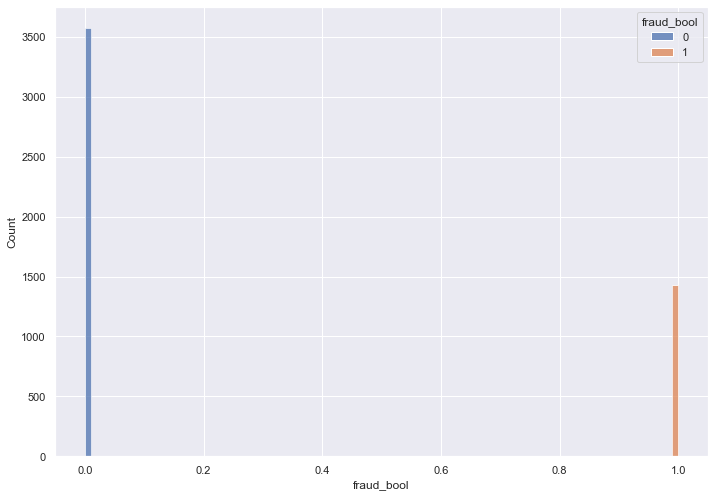

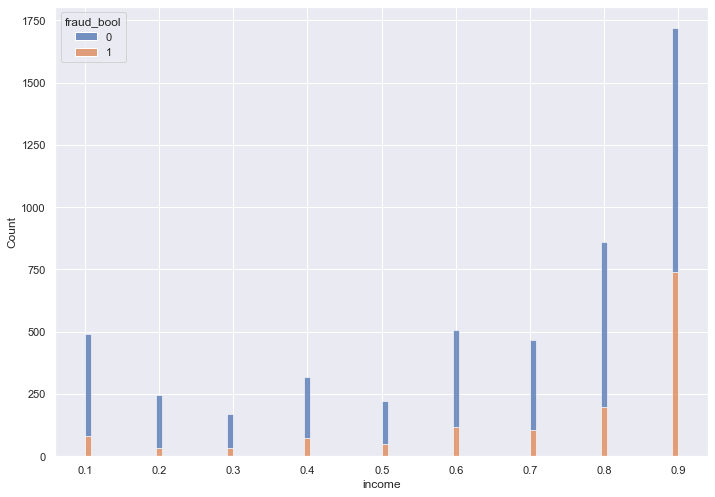

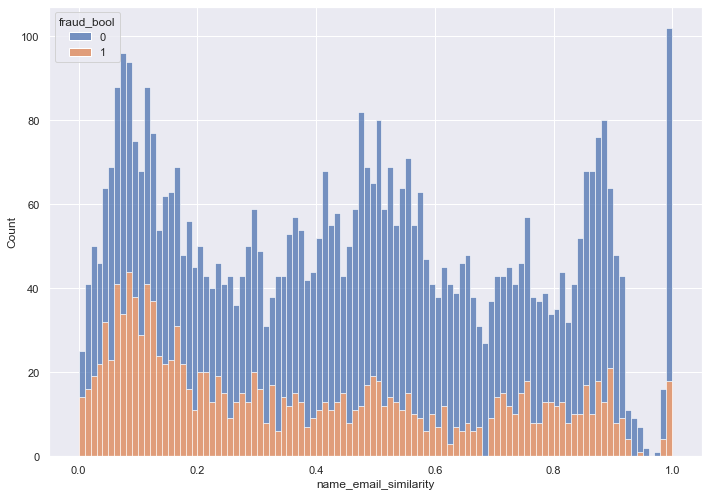

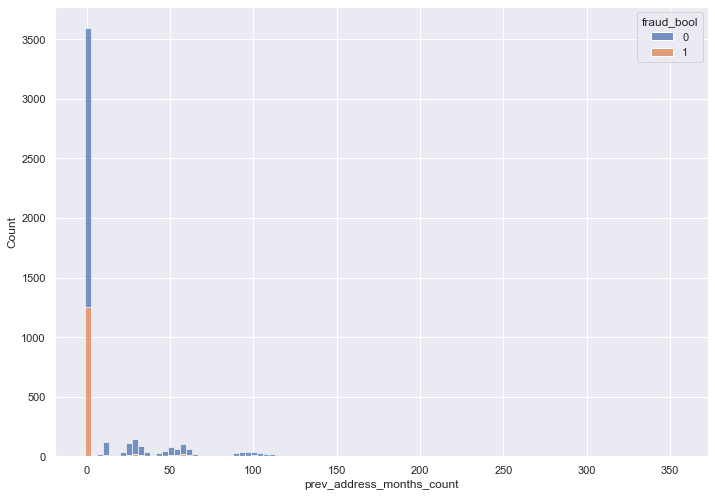

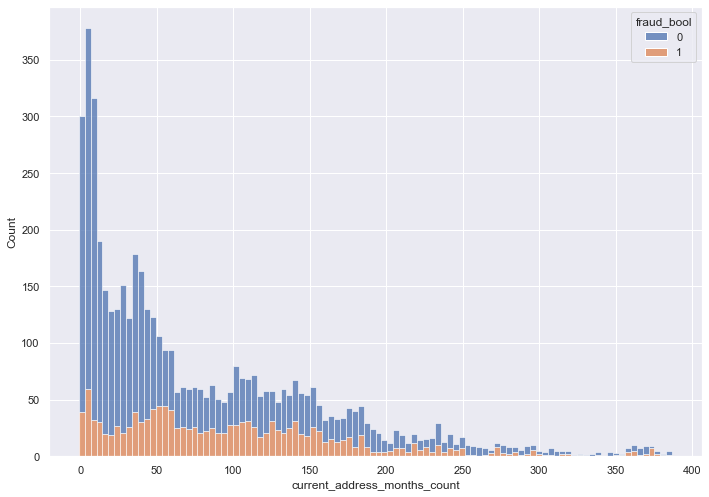

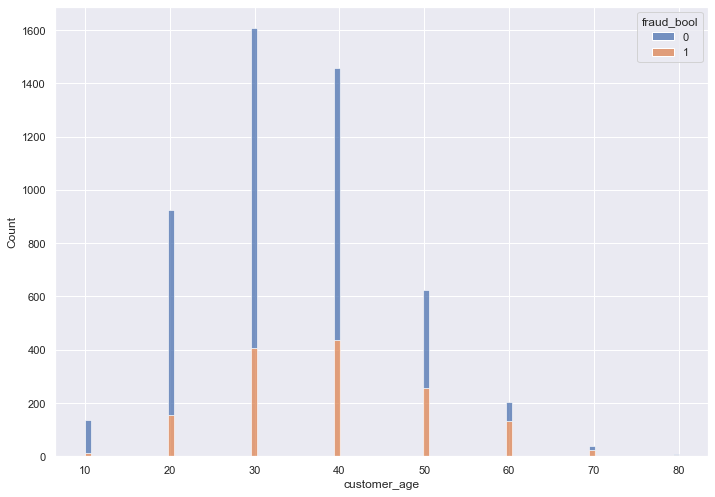

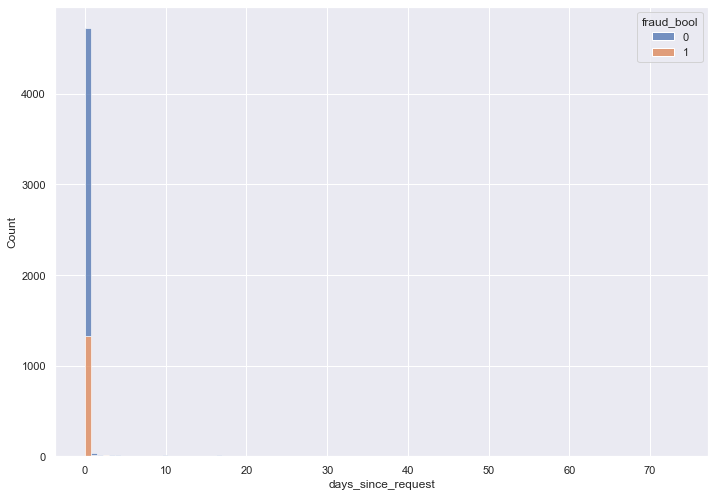

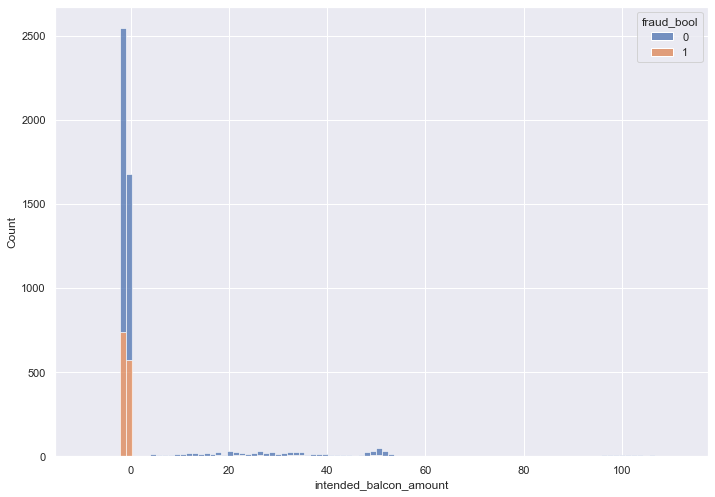

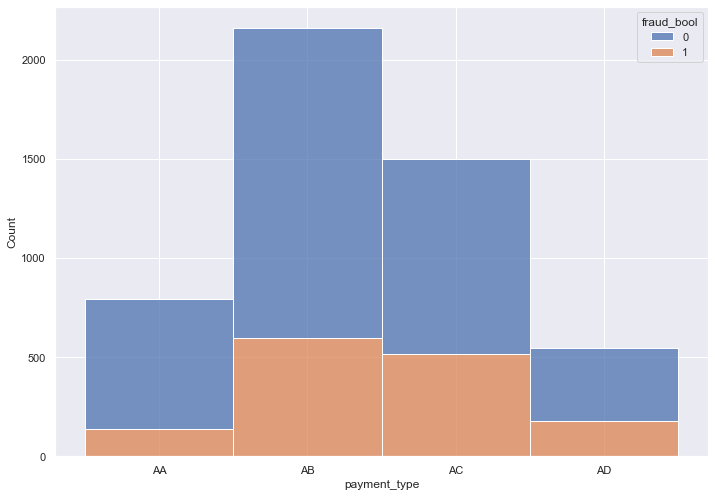

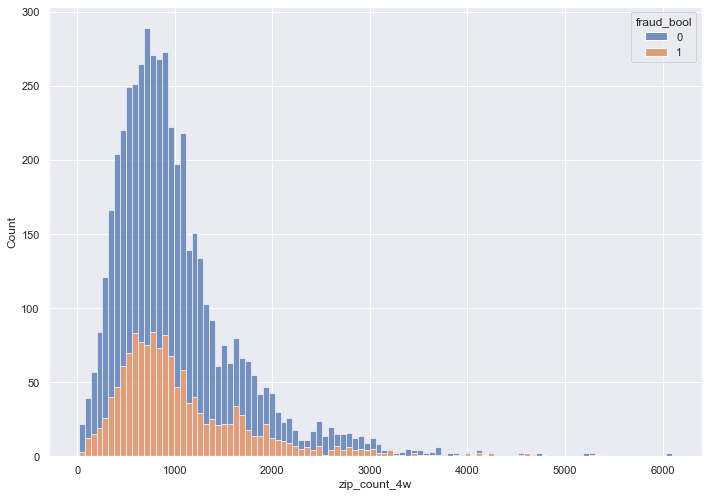

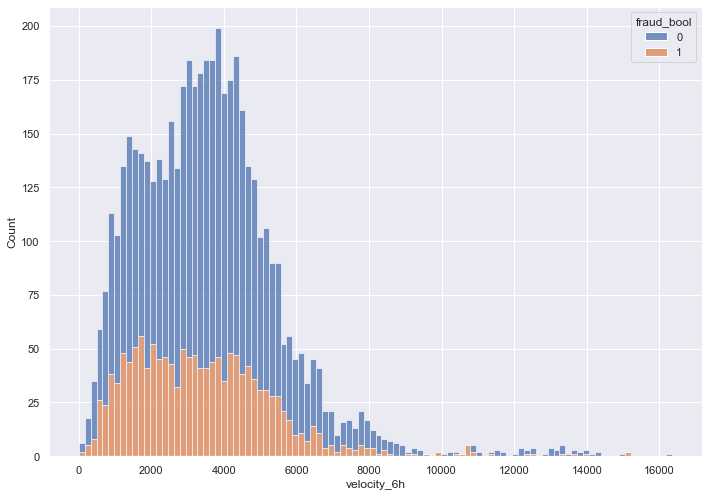

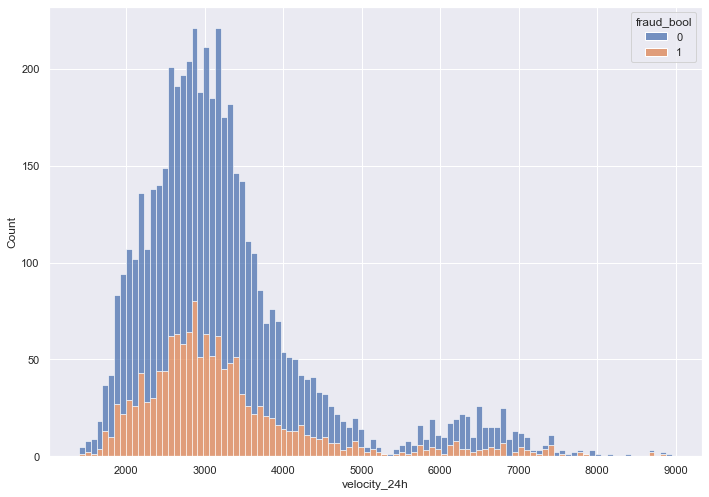

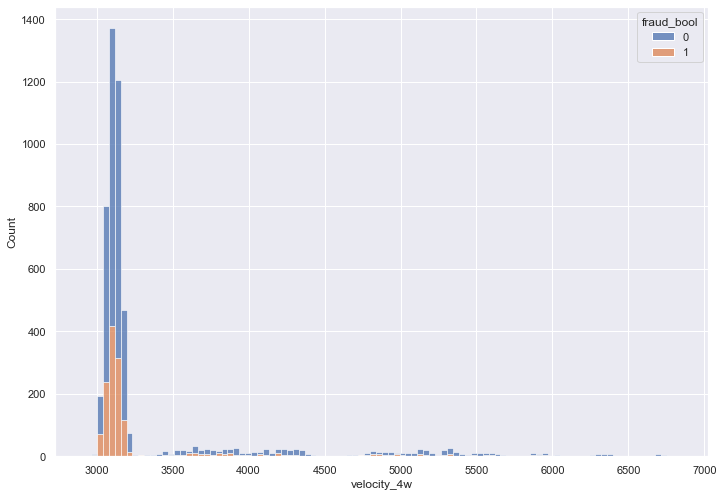

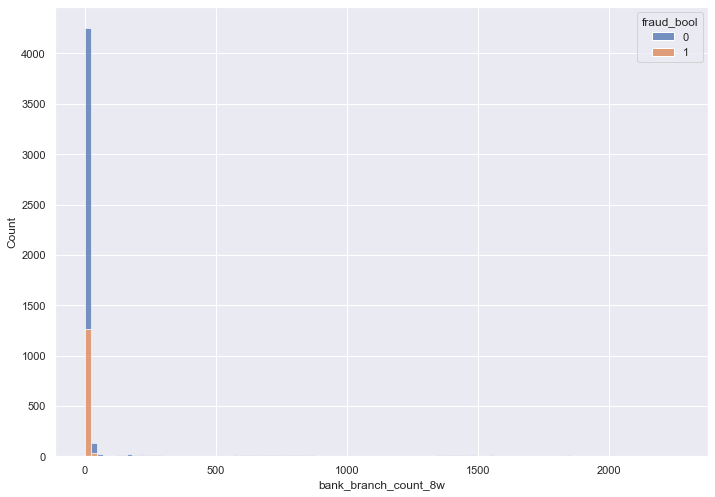

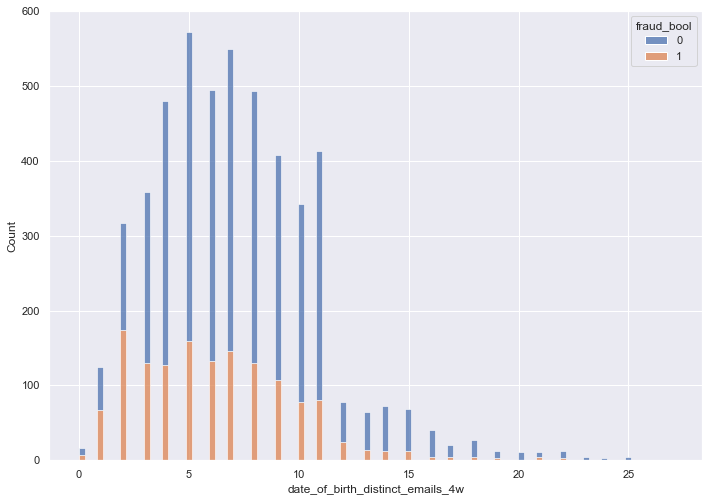

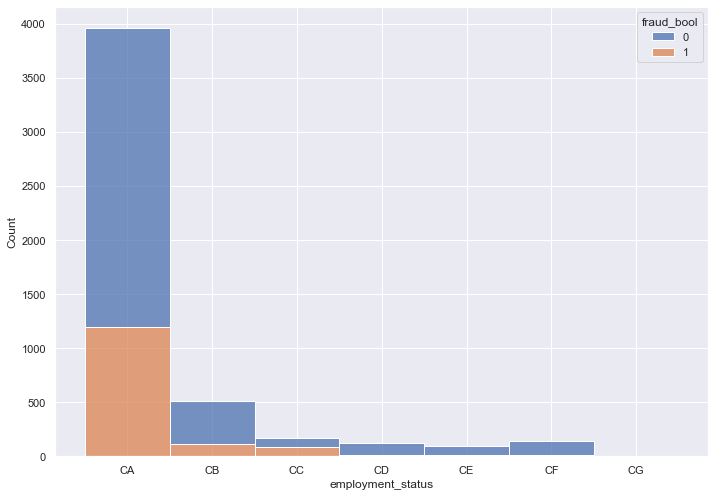

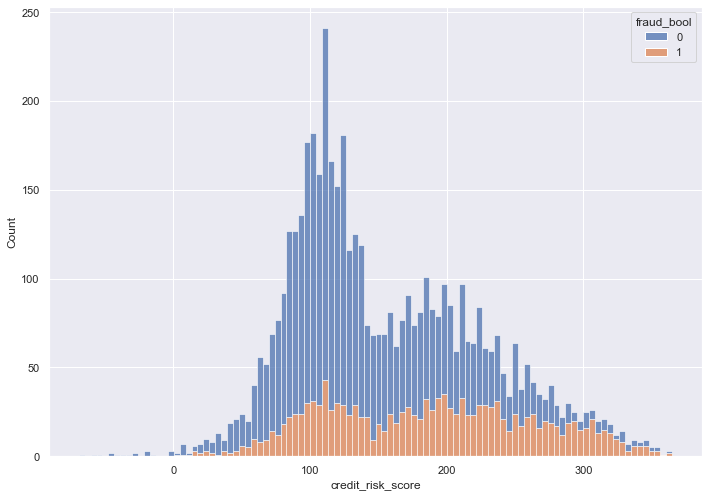

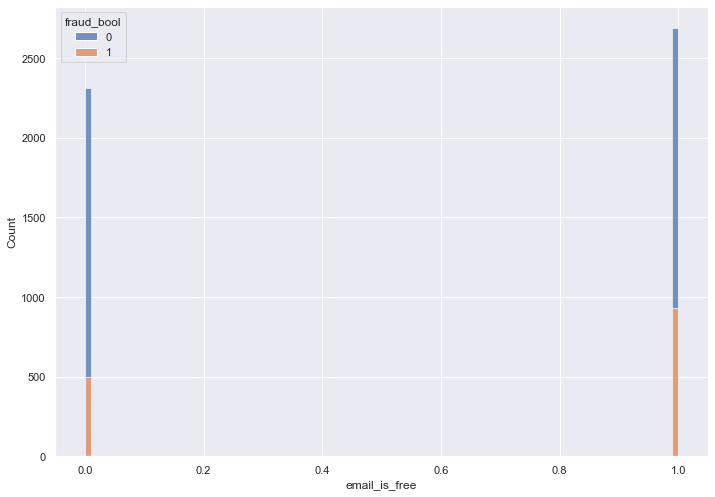

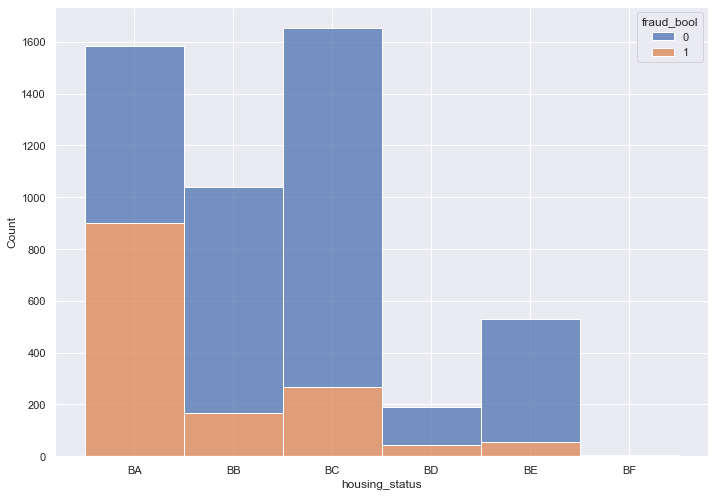

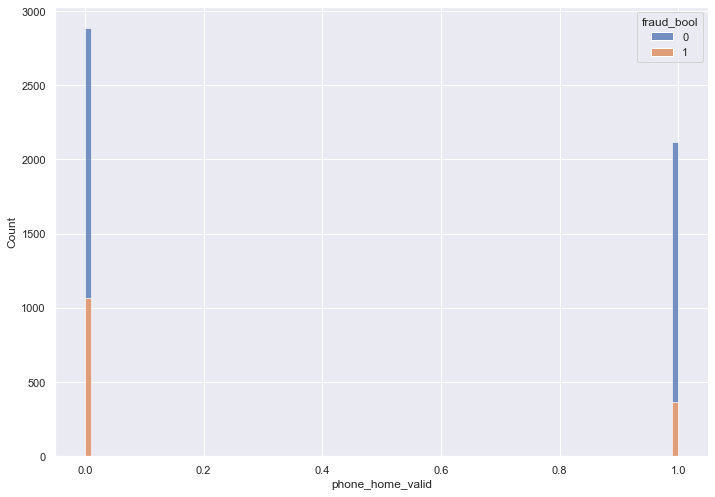

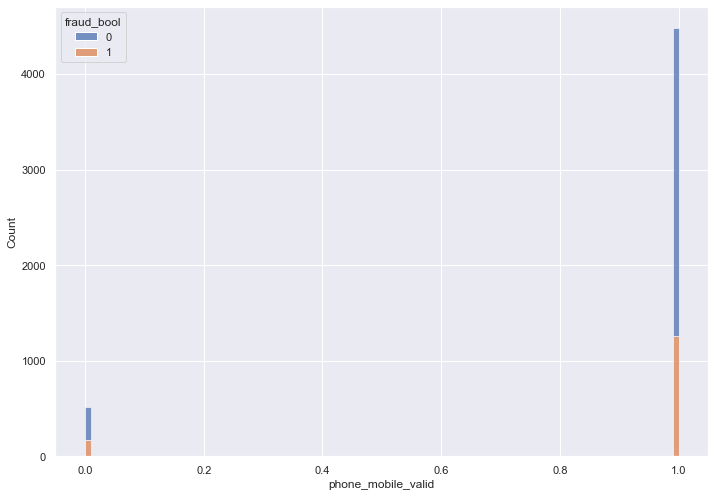

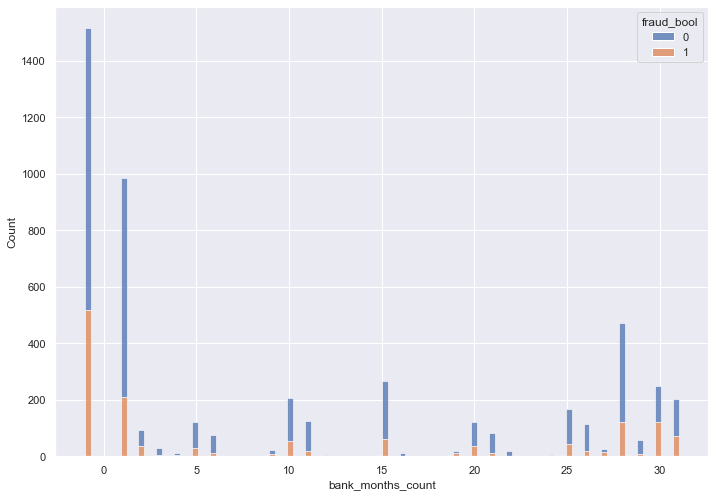

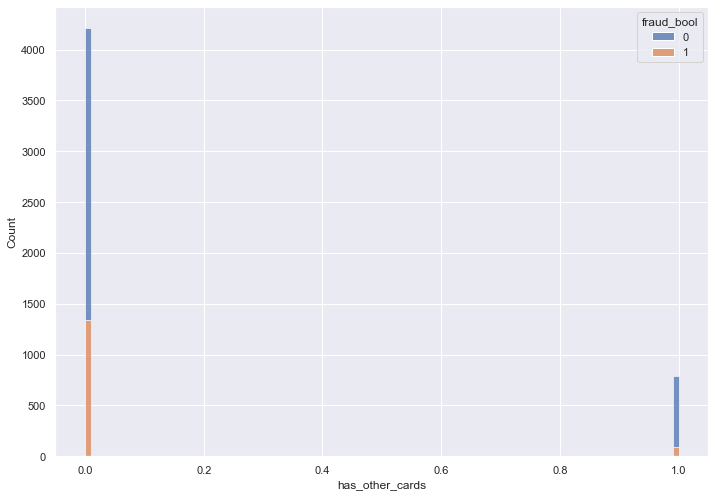

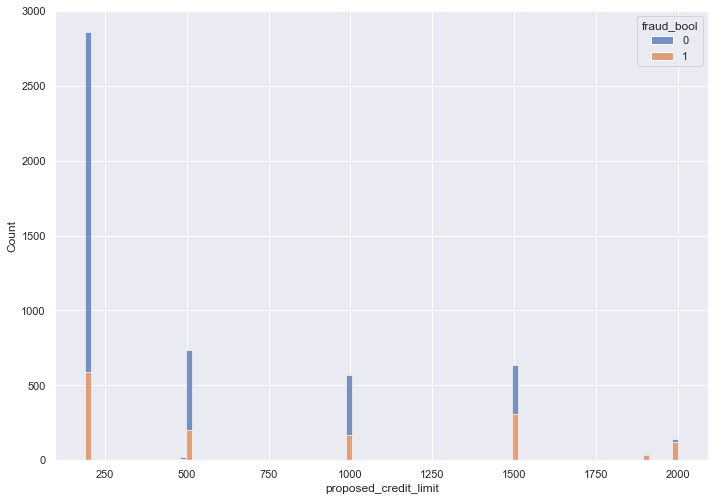

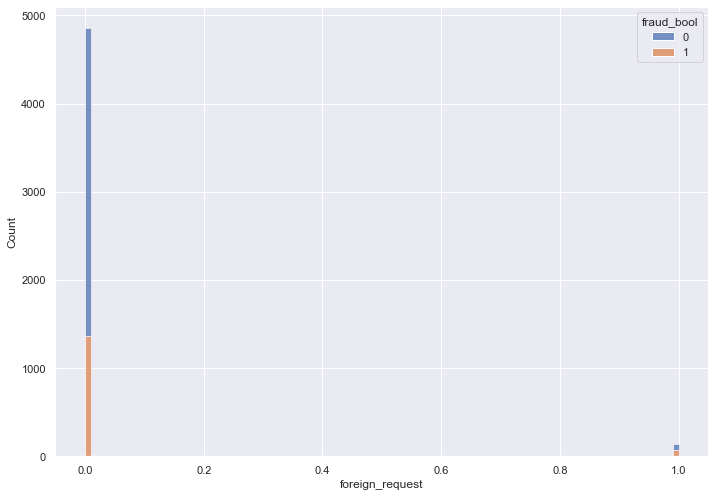

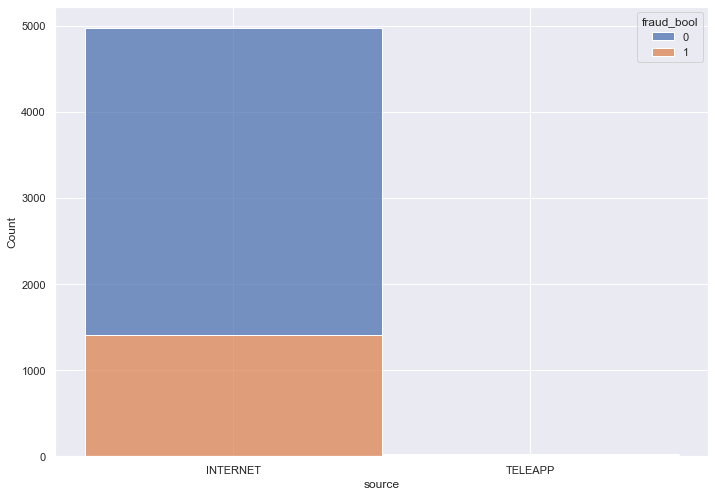

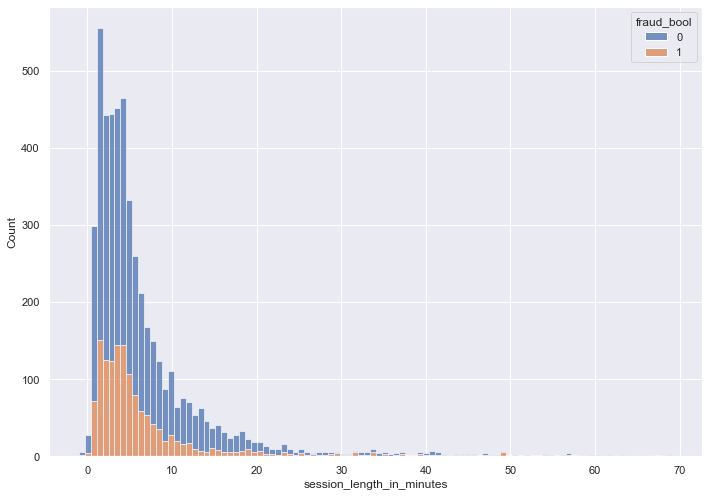

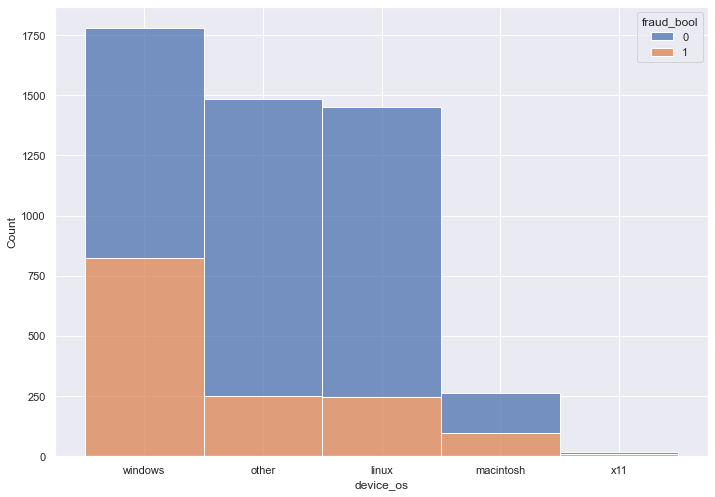

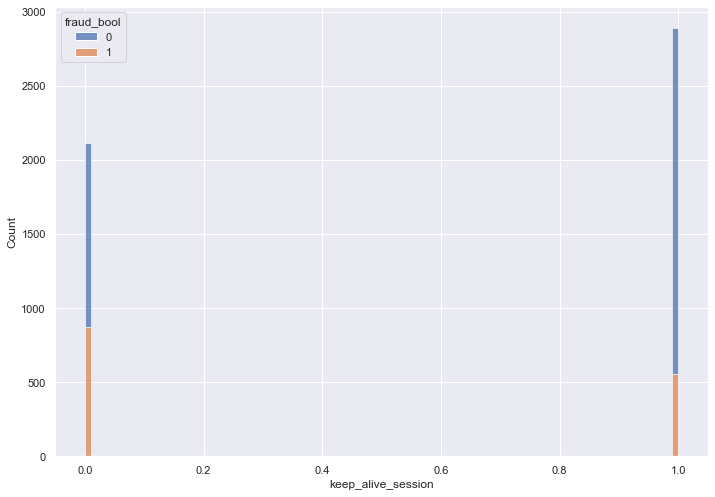

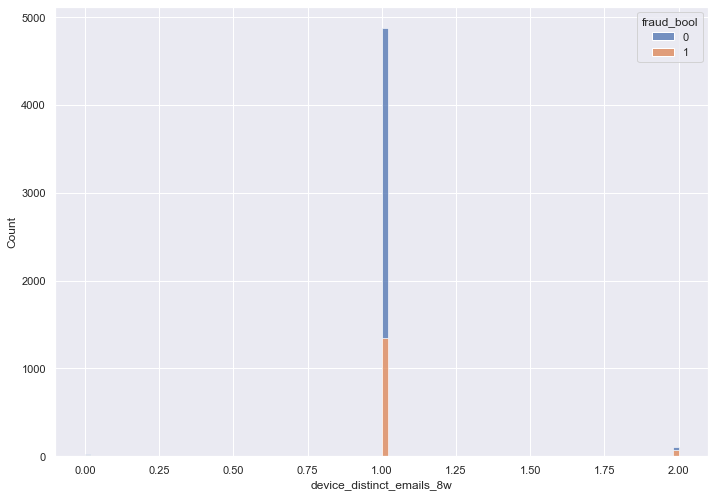

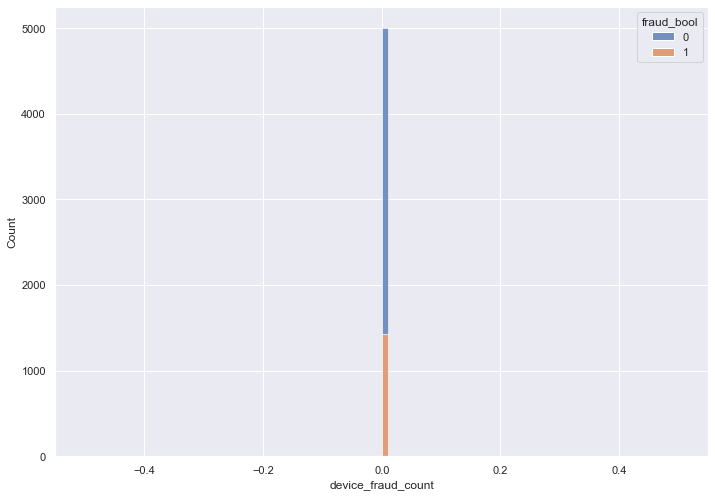

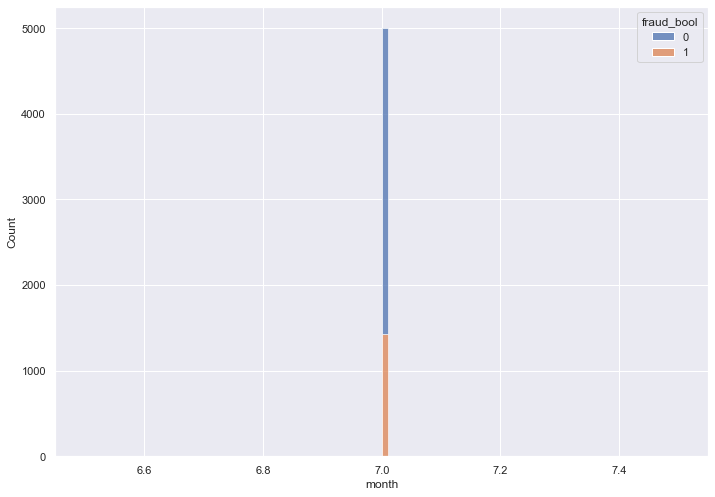

In [106]:
distribution_graph(df1, 'fraud_bool')

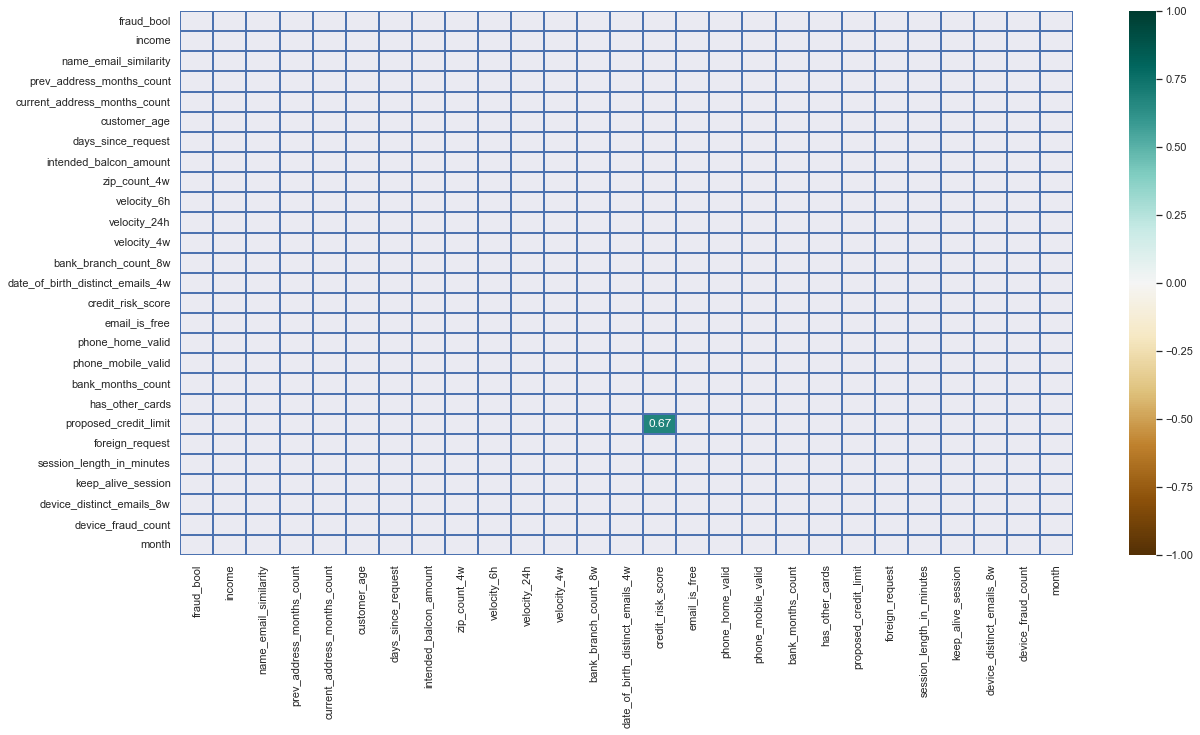

In [100]:
corr_heatmap(df1)

# Data 2

In [84]:
# load data
df2 = load_data('customer_segment.csv')
df2.drop(columns= ['ID'],inplace=True)
# transform target variable
from sklearn.preprocessing import LabelEncoder
df2.Segmentation=LabelEncoder().fit_transform(df2.Segmentation)

df_info(df2, 'Segmentation')

data size: 
 (5000, 10)
target variable size: 
 Segmentation
3               1437
2               1218
0               1213
1               1132
dtype: int64
columns: 
 Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')


In [85]:
missing_value(df2)

                      0
Work_Experience  0.1068
Family_Size      0.0422
Profession       0.0178
Ever_Married     0.0168
Var_1            0.0108
Graduated        0.0104


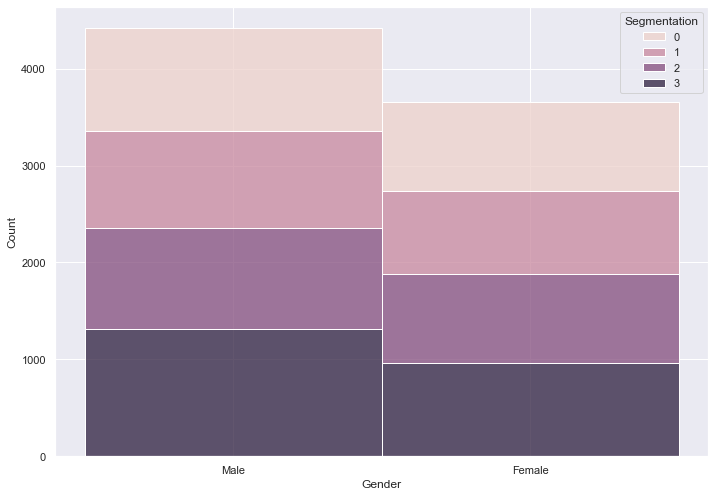

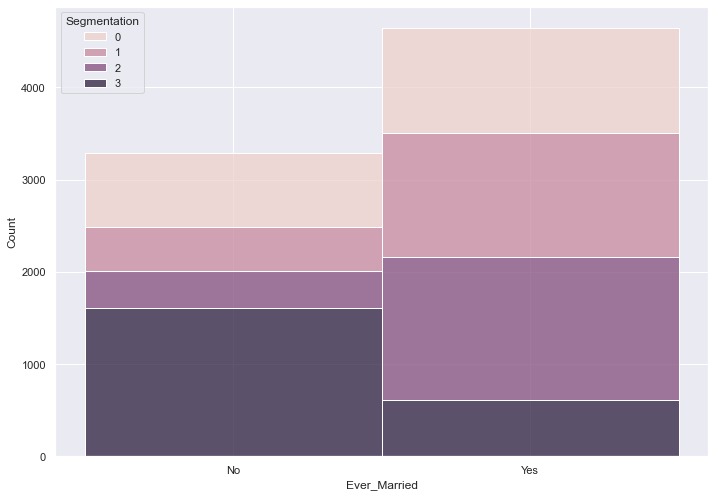

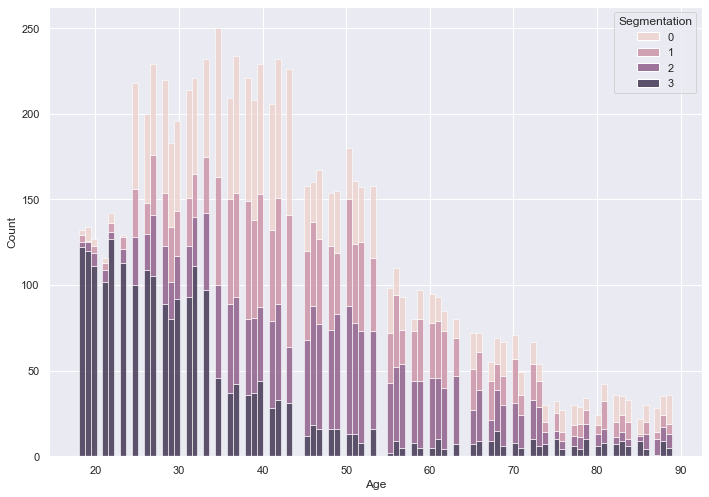

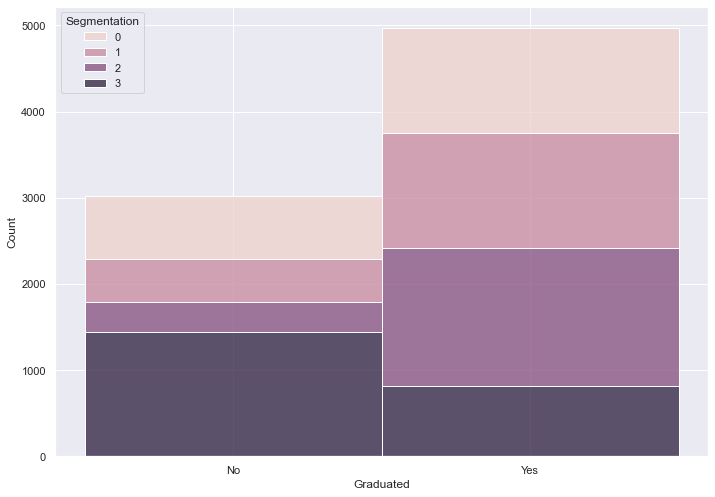

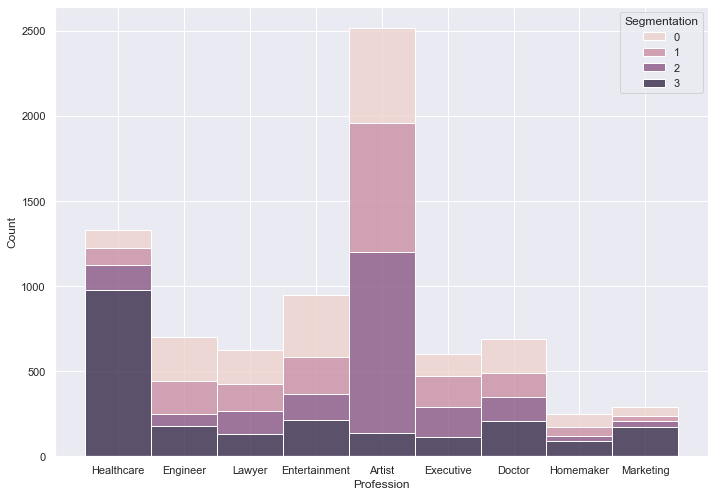

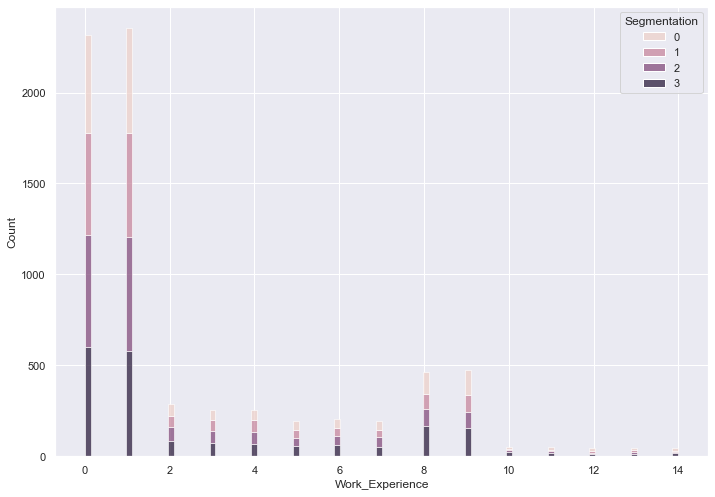

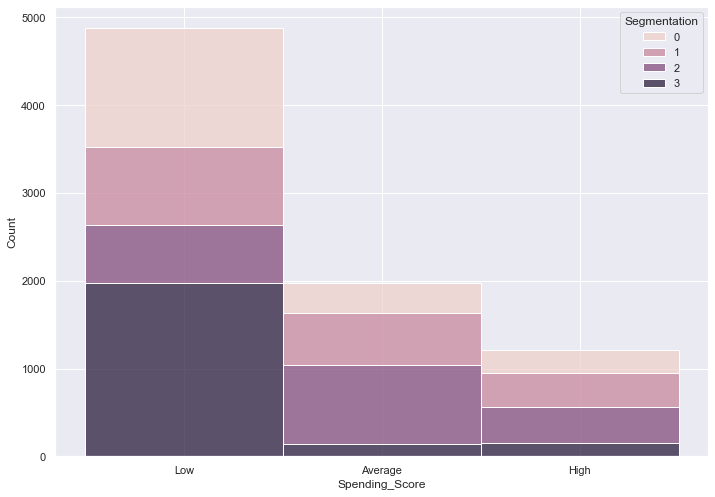

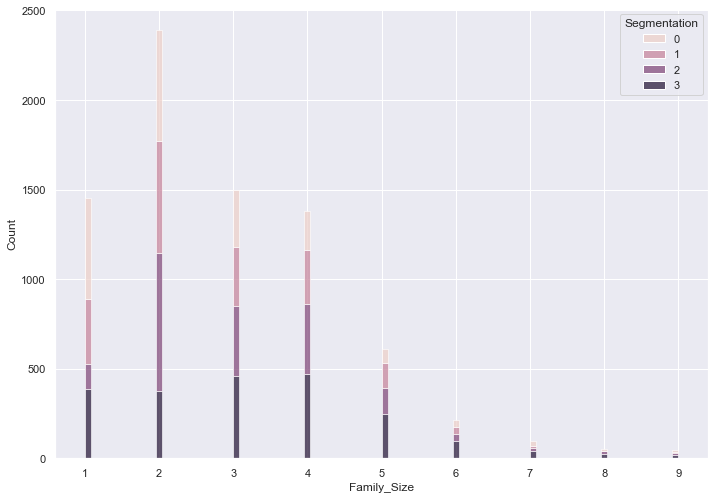

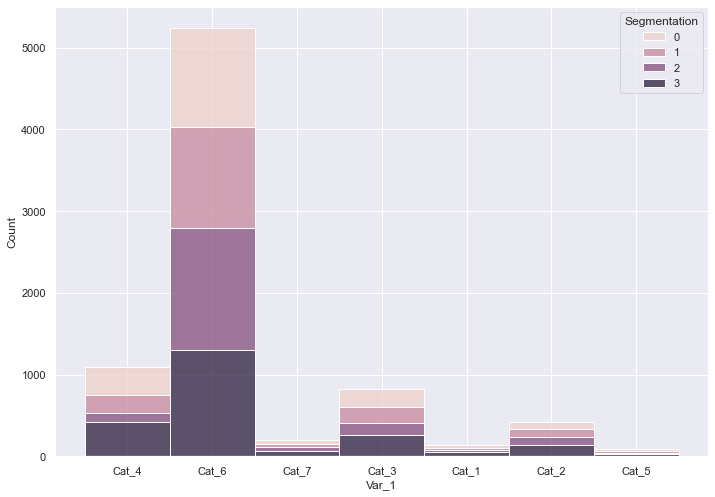

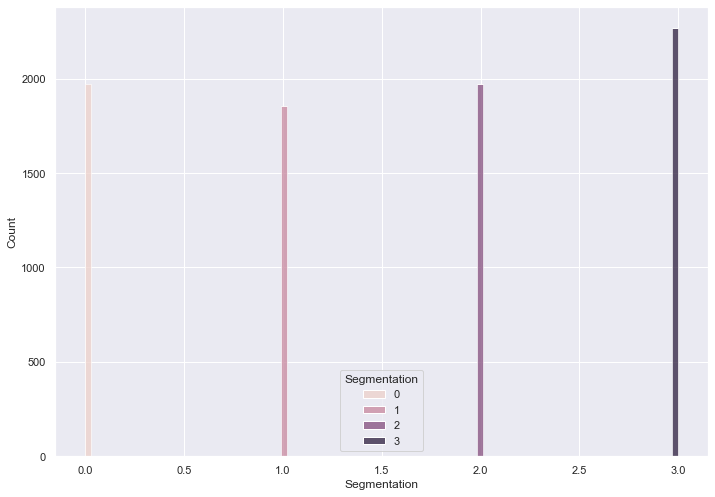

In [22]:
distribution_graph(df2, 'Segmentation')

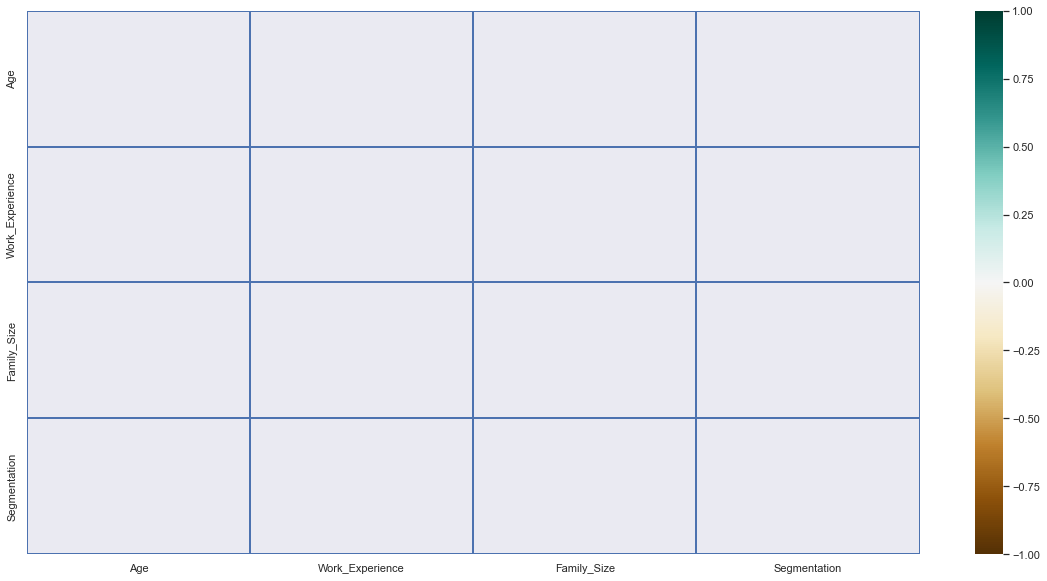

In [23]:
corr_heatmap(df2)